In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice

In [2]:
# SPICE test
spice.tkvrsn('TOOLKIT')

'CSPICE_N0067'

Import SPICE user Lib

In [3]:
import sys

# import SPICE user lib
sys.path.append('../lib/')
import juno_spice_lib as juno_lib
import juice_spice_lib as juice_lib

Load SPICE kernels

In [4]:
# load SPICE ketnels
#source_dir = 'C:/share/Linux/doc/spice/'
source_dir = '/Users/Shared/spice/'
juno_lib.spice_ini(source_dir)

S/C orbit around Jupiter (after JOI)

In [38]:
# set date/time
utctim = '2016-07-06T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 365*4  # number of data
dt = 60*60*34     # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_JUPITER', tar='JUNO', org='JUPITER', x_ref='SUN', corr='LT+S')


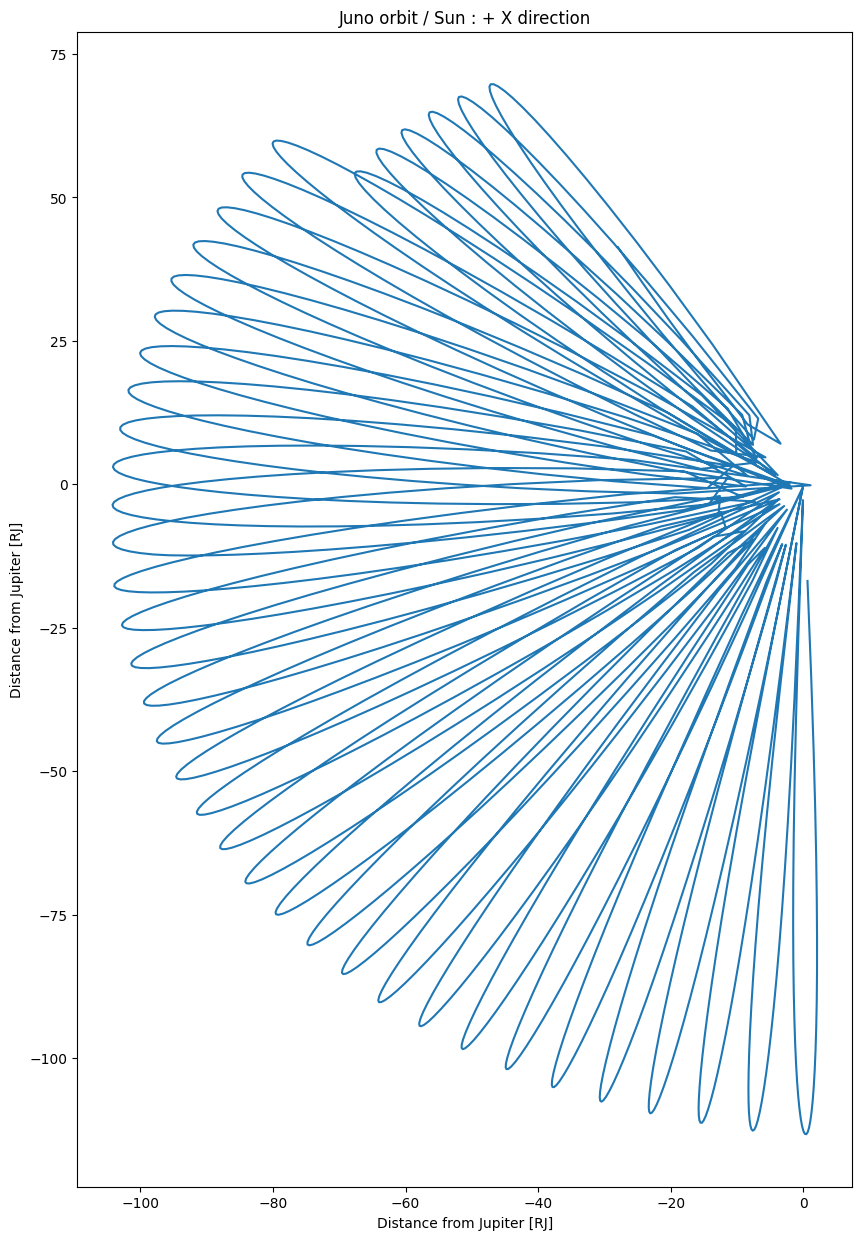

In [39]:
# plot
rj = 71400.0  # [km]
plt.figure(figsize=(10, 15))
plt.plot(x/rj, y/rj)
plt.title('Juno orbit / Sun : + X direction')
plt.xlabel('Distance from Jupiter [RJ]')
plt.ylabel('Distance from Jupiter [RJ]')
plt.show()

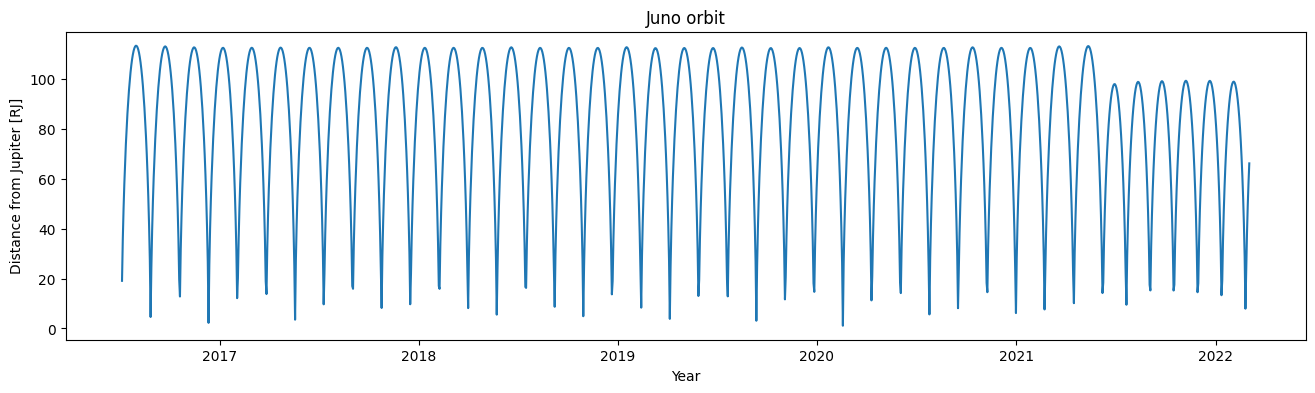

In [41]:
# plot
td = spice.et2datetime(et)
rj = 71400.0  # [km]
plt.figure(figsize=(16, 4))
plt.plot(td, r/rj)
plt.title('Juno orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Jupiter [RJ]')
plt.show()

In [44]:
# set date/time
utctim = '2016-09-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*365*3.6  # number of data
dt = 60*60    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_JUPITER', tar='JUNO', org='JUPITER', x_ref='SUN', corr='LT+S')

Text(0, 0.5, 'Z distance from Jupiter [RJ]')

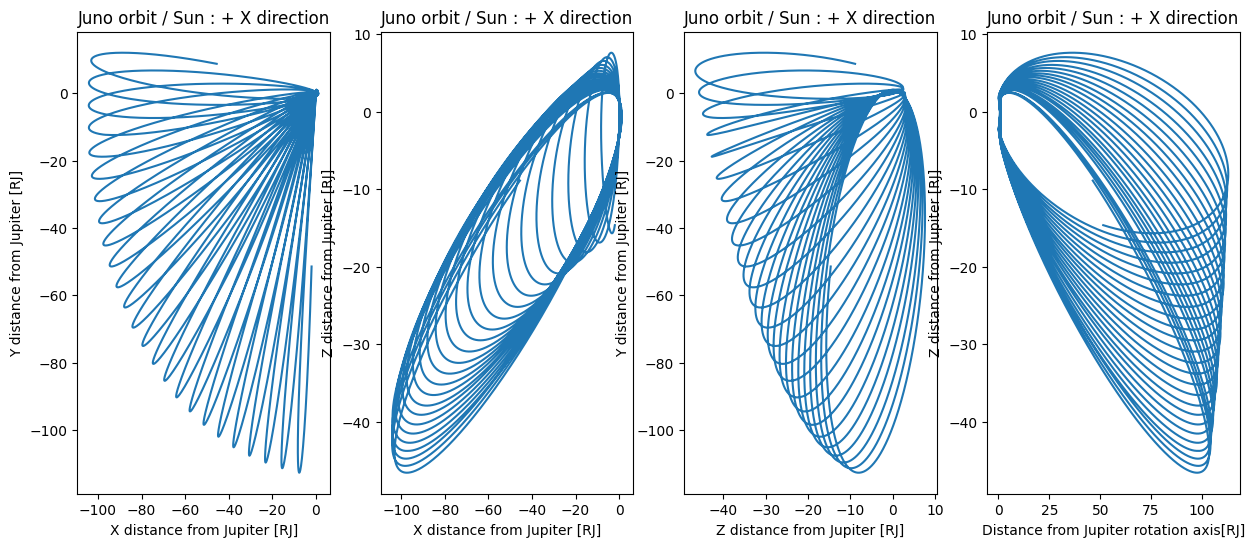

In [53]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    1, 4, figsize=(15.0, 6.0))

# plot
rj = 71400.0  # [km]
ax1.plot(x/rj, y/rj)
ax1.set_title('Juno orbit / Sun : + X direction')
ax1.set_xlabel('X distance from Jupiter [RJ]')
ax1.set_ylabel('Y distance from Jupiter [RJ]')

ax2.plot(x/rj, z/rj)
ax2.set_title('Juno orbit / Sun : + X direction')
ax2.set_xlabel('X distance from Jupiter [RJ]')
ax2.set_ylabel('Z distance from Jupiter [RJ]')

ax3.plot(z/rj, y/rj)
ax3.set_title('Juno orbit / Sun : + X direction')
ax3.set_xlabel('Z distance from Jupiter [RJ]')
ax3.set_ylabel('Y distance from Jupiter [RJ]')

xy = np.sqrt(x*x+y*y)
ax4.plot(xy/rj, z/rj)
ax4.set_title('Juno orbit / Sun : + X direction')
ax4.set_xlabel('Distance from Jupiter rotation axis[RJ]')
ax4.set_ylabel('Z distance from Jupiter [RJ]')


S/C orbit around Jupiter & Europa

In [ ]:
# set date/time
utctim = '2031-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*365*3.6  # number of data
dt = 60*60     # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(et, ref='IAU_EUROPA', tar='EUROPA CLIPPER', org='EUROPA')


In [ ]:
# plot
rj = 71400.0  # [km]

td = spice.et2datetime(et)
plt.figure(figsize=(16, 4))
plt.plot(td, r/rj)
plt.title('Europa clipper orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Europa [RJ]')
plt.show()


S/C orbit around Europa

In [ ]:
# set date/time
utctim = '2031-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*24*365*3.6  # number of data
dt = 60    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_EUROPA', 'EUROPA CLIPPER', 'EUROPA')

In [ ]:
# plot
plt.plot(x, y)
prange = 10000.0
plt.xlim(-prange, prange)
plt.ylim(-prange, prange)
plt.title('EUROPA Clipper orbit')
plt.xlabel('X distance from EUROPA [km] (+:Jupiterward)')
plt.ylabel('Y distance from EUROPA [km]')

plt.show()

In [ ]:
# plot
td = spice.et2datetime(et)
plt.figure(figsize=(16, 4))
plt.plot(td, r)
plt.ylim(0.0, 100000.0)
plt.title('EUROPA Clipper orbit')
plt.xlabel('Year')
plt.ylabel('Distance from EUROPA [km]')
plt.show()

Search closest approach

In [ ]:
ca_time = []
ca_dist = []

for i in range(1,int(nd)-2):
    if r[i] < r[i-1] and r[i] < r[i+1] and r[i] < 20000.0:
        ca_time.append(td[i])
        ca_dist.append(r[i])

n = len(ca_time)
for i in range(n):
    print(i,ca_time[i], ca_dist[i])

plt.plot(td, r)
plt.plot(ca_time, ca_dist, '+')
plt.ylim(0.0, 100000.0)
plt.xlabel('Year')
plt.ylabel('Distance from EUROPA [km]')
plt.show()

Apparent diameter of Europa seen from Europa Clipper

In [ ]:
re = 1560.8  # [km]
appdia = 2.0*np.arctan(re/r) / np.pi * 180.0  # degree

# Spatial resolution of UVIS onboard Europa clipper : 0.15 deg/pixel
pltscl=0.15

n1 = sum(x > pltscl*20 for x in appdia)
n2 = sum(x > pltscl*10 for x in appdia)
n3 = sum(x > pltscl*4 for x in appdia)
print("Total time [day]: ", float(nd)/60.0/24.0)
print("Time when spatial resolution < 0.1Re [day]: ", float(n1)/60.0/24.0)
print("Time when spatial resolution < 0.2Re [day]: ", float(n2)/60.0/24.0)
print("Time when spatial resolution < 0.5Re [day]: ", float(n3)/60.0/24.0)

# plot
plt.figure(figsize=(16, 4))
plt.plot(td, appdia, label='Europa [deg]')
xx = [td[0], td[len(td)-1]]
yy1 = [pltscl*20, pltscl*20]
yy2 = [pltscl*10, pltscl*10]
yy3 = [pltscl*4, pltscl*4]
plt.plot(xx, yy1, label='20 div')
plt.plot(xx, yy2, label='10 div')
plt.plot(xx, yy3, label='4 div')
plt.title('Apparent diameter of Europa seen from Europa Clipper')
plt.xlabel('Year')
plt.ylabel('degree')
plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
utctim1 = '2031-07-07T00:00:00'
utctim2 = '2031-07-11T00:00:00'
td1 = spice.et2datetime(spice.str2et(utctim1))
td2 = spice.et2datetime(spice.str2et(utctim2))
index = np.where((td>td1) & (td<td2))

# plot
plt.figure(figsize=(16, 4))
plt.plot(td[index], appdia[index], label='Europa [deg]')
#plt.xlim([td1, td2])
xx = [td1, td2]
plt.plot(xx, yy1, label='20 div')
plt.plot(xx, yy2, label='10 div')
plt.plot(xx, yy3, label='4 div')
plt.title('Apparent diameter of Europa seen from Europa Clipper')
plt.xlabel('Year')
plt.ylabel('degree')
plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
re = 1560.8  # [km]
idx = np.where(r > re*2)
xx=x
xx[idx] = np.nan
yy=y
yy[idx] = np.nan
zz=z
zz[idx] = np.nan
rr=r
rr[idx] = np.nan
llat=lat
llat[idx] = np.nan
llon=lon
llon[idx] = np.nan

prange = 2.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18.0, 6.0), sharex=True, sharey=True)

#ax1.scatter(x/re, y/re, s=1.0)
ax1.plot(xx/re, yy/re)
ax1.plot(xx[index]/re, yy[index]/re)
ax1.set_xlim(-prange, prange)
ax1.set_ylim(-prange, prange)
ax1.set_title('EUROPA Clipper orbit')
ax1.set_xlabel('X distance from EUROPA [Re]')
ax1.set_ylabel('Y distance from EUROPA [Re]')

#ax2.scatter(y/re, z/re, s=1.0)
ax2.plot(yy/re, zz/re)
ax2.plot(yy[index]/re, zz[index]/re)
ax2.set_xlim(-prange, prange)
ax2.set_ylim(-prange, prange)
ax2.set_title('EUROPA Clipper orbit')
ax2.set_xlabel('Y distance from EUROPA [Re]')
ax2.set_ylabel('Z distance from EUROPA [Re]')

ax3.plot(xx/re, zz/re)
ax3.plot(xx[index]/re, zz[index]/re)
ax3.set_xlim(-prange, prange)
ax3.set_ylim(-prange, prange)
ax3.set_title('EUROPA Clipper orbit')
ax3.set_xlabel('X distance from EUROPA [Re]')
ax3.set_ylabel('Z distance from EUROPA [Re]')


In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(llon*180.0/np.pi, llat*180.0/np.pi,s=3.0)
plt.scatter(llon[index]*180.0/np.pi, llat[index]*180.0/np.pi, s=15.0)
plt.title('EUROPA Clipper orbit (h<1Reuropa)')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12.0, 8.0))

ax1.scatter(td, llat*180.0/np.pi, s=3.0)
ax1.scatter(td[index], llat[index]*180.0/np.pi, s=15.0)
ax1.set_title('EUROPA Clipper orbit')
ax1.set_xlabel('Date')
ax1.set_ylabel('Latitude [deg]')

ax2.scatter(td, llon*180.0/np.pi, s=3.0)
ax2.scatter(td[index], llon[index]*180.0/np.pi, s=15.0)
ax2.set_xlabel('Date')
ax2.set_ylabel('Longitude [deg]')